In [82]:
# import dense, numpy
import numpy as np
from scipy.linalg import expm
import dense
import cvxpy as cp
import matplotlib.pyplot as plt
import dense
import time as tim
from scipy.signal import cont2discrete



In [85]:
# Define the matrices for a discrete double integrator system
A = np.array([[0, 1], [0, 0]])
B = np.array([[0], [1]])
C = np.array([[1, 0]])
D = np.array([[0]])
# Discretize using cont2discrete
T = 1
system = (A, B, C, D)
discrete_system = cont2discrete(system, T, method='zoh')

# Extract discrete-time matrices
A, B, C, D, _ = discrete_system


In [121]:
Qx = np.eye(2)
Qu = np.eye(1)*0.1

sim_len = 40
N = 5

umax = np.array([[1]])
umin = np.array([[-1]])

x = np.zeros((2, sim_len+1))
u = np.zeros((1, sim_len+1))



x0 = np.array([[0.5], [2]])
x_ref = np.array([[10], [1]])
u_prev = np.array([[0]])
x[:,0] = x0[:,0]

In [122]:
start = tim.time()
for i in range(sim_len):
    Q = dense.quad_form_cr(A, B, Qx, Qu, N)
    c = dense.lin_form_cr(A, B, Qx, Qu, N, x0, x_ref, u_prev)
    F = dense.constraint_matrix_sr_nox(N)
    g = dense.upper_bound_sr_nox(N,umax, umin)
    
    U = cp.Variable((N, 1))
    
    objective = cp.Minimize(cp.quad_form(U, Q) + c @ U)
    constraints = [F @ U <= g]
    
    problem_mpc = cp.Problem(objective, constraints)
    problem_mpc.solve()
    
    print(problem_mpc.objective.value)
    #print(U.value)
    u[:, i] = U.value[0, :].reshape(-1, 1)
    
    # propagation in time
    x[:, i+1] = A @ x[:, i] + B @ u[:, i]
    
        
    x0 = x[:, i+1] #x[:, i+1] #- x_in_0[:,0] #get_x(y[:,i])[:,0]
    u_prev = u[:,i]
    #print(sum(x0))
    print(i)
end = tim.time()
print(f"Elapsed time MPC: {end-start:.2f} sec")

-28.920566002078793
0
-104.8089219641034
1
-195.9532947004063
2
-111.08648610376957
3
-28.94765918763304
4
-0.7280819978436891
5
-1.889849764790562
6
-1.1841317864212633
7
-0.9524700660884204
8
-0.942439169749922
9
-0.9560111246179335
10
-0.9592788807210555
11
-0.958620616100604
12
-0.958114885899701
13
-0.9580278710533382
14
-0.9580404071728854
15
-0.958046673488425
16
-0.9580456161097497
17
-0.9580443486873981
18
-0.9580439744232216
19
-0.9580439328038127
20
-0.9580439316380214
21
-0.9580439264314939
22
-0.9580439223220485
23
-0.9580439207479242
24
-0.9580439203487633
25
-0.958043920250285
26
-0.9580439202107284
27
-0.9580439201917733
28
-0.9580439201842174
29
-0.9580439201816878
30
-0.9580439201810129
31
-0.9580439201807246
32
-0.9580439201805157
33
-0.9580439201805903
34
-0.9580439201804766
35
-0.9580439201805052
36
-0.958043920180473
37
-0.9580439201805052
38
-0.9580439201805271
39
Elapsed time MPC: 0.13 sec


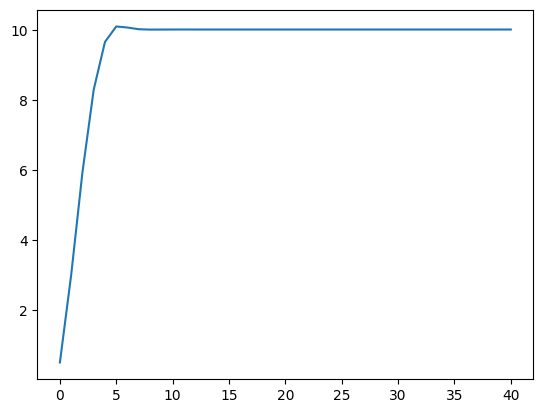

In [123]:
plt.plot(x[0,:])

In [124]:
x[:,-1]

array([1.00178467e+01, 2.85726867e-15])

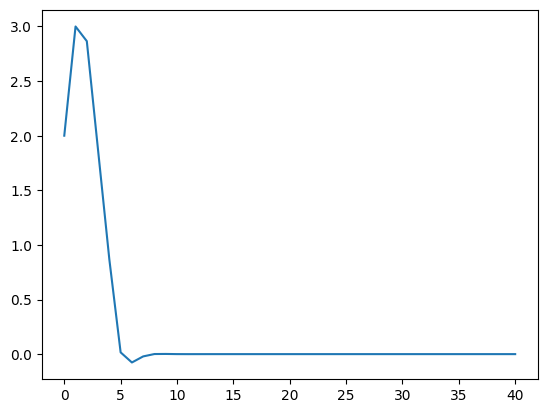

In [125]:
plt.plot(x[1,:])

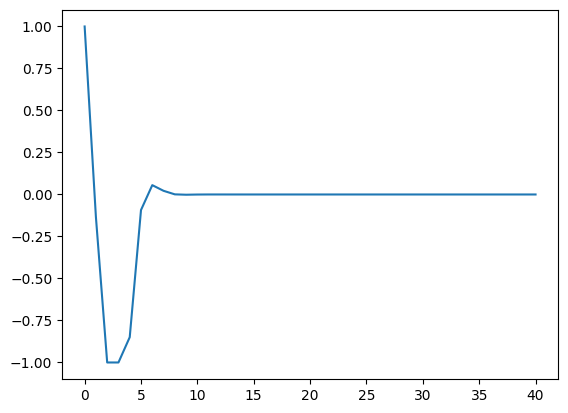

In [126]:
plt.plot(u.T)